In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [143]:
file = pd.read_csv("train(1).csv")

In [144]:
file

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [145]:
len(file.PassengerId.unique()) == len(file)

True

PassengerId is not repeated

In [146]:
ls  = ['PassengerId','Name']
file  = file.drop(ls, axis = 1).copy()

In [147]:
file.isnull().sum() #Many null values

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [148]:
file.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [149]:
file['Age'] = file['Age'].replace(np.nan, file.Age.mean())

In [150]:
file['RoomService'] = file['RoomService'].replace(np.nan, 0)
file['FoodCourt'] = file['FoodCourt'].replace(np.nan, 0)
file['ShoppingMall'] = file['ShoppingMall'].replace(np.nan, 0)
file['Spa'] = file['Spa'].replace(np.nan, 0)
file['VRDeck'] = file['VRDeck'].replace(np.nan, 0)

In [151]:
file.isnull().sum().sum()/len(file)

0.11526515587254113

In [152]:
file = file.dropna(axis =0).copy()

In [153]:
file.isnull().sum().sum()/len(file)

0.0

Earth     4197
Europa    1936
Mars      1603
Name: HomePlanet, dtype: int64


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



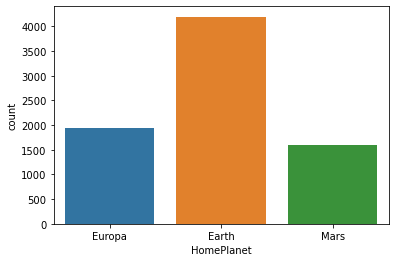

In [154]:
sns.countplot(file.HomePlanet)
print(file.HomePlanet.value_counts())

In [155]:
file = file.reset_index(drop=True)

In [156]:
earth,europa,mars = 0,0,0
file.shape

for i in range(len(file)):
    if file.loc[:,'HomePlanet'][i] == 'Europa' and file.loc[:,'Transported'][i]==True:
        europa+=1
    if file.loc[:,'HomePlanet'][i] == 'Earth' and file.loc[:,'Transported'][i]==True:
        earth+=1
    if file.loc[:,'HomePlanet'][i] == 'Mars' and file.loc[:,'Transported'][i]==True:
        mars+=1

In [157]:
print("Percent of Europa : ", europa/((file.loc[:,'HomePlanet']=='Europa').sum()) *100)
print("Percent of Earth : ", earth/((file.loc[:,'HomePlanet']=='Earth').sum()) *100)
print("Percent of Mars : ", mars/((file.loc[:,'HomePlanet']=='Mars').sum()) *100)

Percent of Europa :  65.96074380165288
Percent of Earth :  42.482725756492734
Percent of Mars :  51.96506550218341


Analysis with Cyrosleep

In [158]:
file['CryoSleep'].value_counts()

False    4974
True     2762
Name: CryoSleep, dtype: int64

In [159]:
m=0
for i in range(len(file)):
    if file.loc[:,'CryoSleep'][i] == True and file.loc[:,'Transported'][i]==True:
        m+=1
print('Percent of people with cryosleep and transported : ', m/3037*100)

Percent of people with cryosleep and transported :  74.21797826802766


Analysis with Destination

In [160]:
file['Destination'].value_counts()

TRAPPIST-1e      5372
55 Cancri e      1639
PSO J318.5-22     725
Name: Destination, dtype: int64

In [161]:
TRAPPIST,Cancri ,PSO = 0,0,0
file.shape

for i in range(len(file)):
    if file.loc[:,'Destination'][i] == 'TRAPPIST-1e' and file.loc[:,'Transported'][i]==True:
        TRAPPIST+=1
    if file.loc[:,'Destination'][i] == '55 Cancri e' and file.loc[:,'Transported'][i]==True:
        Cancri+=1
    if file.loc[:,'Destination'][i] == 'PSO J318.5-22' and file.loc[:,'Transported'][i]==True:
        PSO+=1

In [162]:
print("Percent of TRAPPIST : ", TRAPPIST/((file.loc[:,'Destination'] == 'TRAPPIST-1e').sum()) *100)
print("Percent of Cancri : ", Cancri/((file.loc[:,'Destination'] == '55 Cancri e').sum()) *100)
print("Percent of PSO : ", PSO/((file.loc[:,'Destination'] == 'PSO J318.5-22').sum()) *100)

Percent of TRAPPIST :  47.040208488458674
Percent of Cancri :  60.95179987797438
Percent of PSO :  50.62068965517241


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

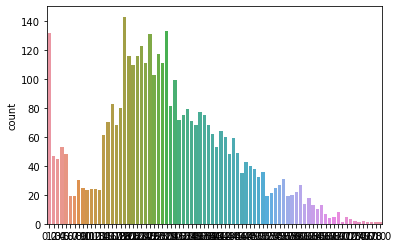

In [163]:
l = [file.loc[:,'Age'][i] for i in range(len(file)) if file.loc[:,'Transported'][i]==True] #Number of True
sns.countplot(l)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

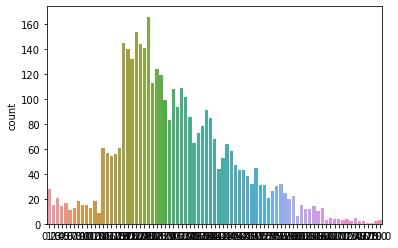

In [164]:
f = [file.loc[:,'Age'][i] for i in range(len(file)) if file.loc[:,'Transported'][i]==False] #Number of True
sns.countplot(f)

Distribution for the two are same

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='VIP', ylabel='count'>

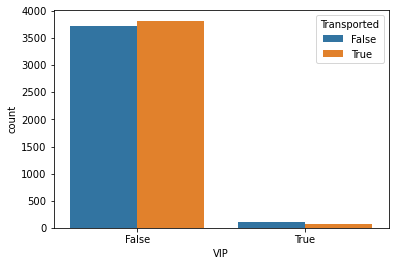

In [165]:
sns.countplot(file.VIP, hue = file.Transported)

No Such relation between VIP and Transportation

In [166]:
file.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [167]:
import plotly.express as px
fig = px.scatter_3d(file, x='RoomService', y='ShoppingMall', z='FoodCourt',
              color='Transported',size_max=30,opacity=0.0)
fig.show()

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

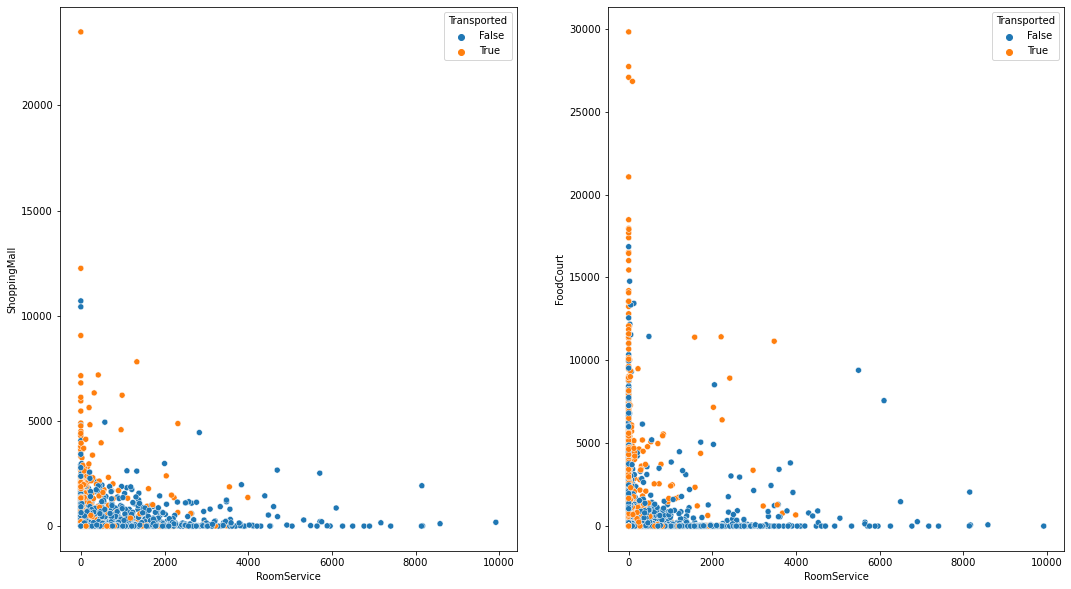

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.scatterplot(ax=axes[0], x=file.RoomService,y=file.ShoppingMall,hue = file.Transported)
sns.scatterplot(ax=axes[1], x=file.RoomService,y=file.FoodCourt,hue = file.Transported)

In [169]:
r_serv, r_serv_and_Trans_false = 0,0
for i in range(len(file)):
    if file.loc[:,'RoomService'][i]!=0:
        r_serv += 1
    if file.loc[:,'RoomService'][i]!=0 and file.loc[:,'Transported'][i]==False:
        r_serv_and_Trans_false += 1

In [170]:
print('People who took Room Services : ', r_serv)
print('People who took Room Services and not Transported : ', r_serv_and_Trans_false)
print('Ratio : ', r_serv_and_Trans_false/r_serv *100)

People who took Room Services :  2618
People who took Room Services and not Transported :  1934
Ratio :  73.87318563789152


People who paid room service amount are not Transported

In [171]:
f_court, f_court_and_Trans_true = 0,0
for i in range(len(file)):
    if file.loc[:,'FoodCourt'][i]!=0:
        f_court += 1
    if file.loc[:,'FoodCourt'][i]!=0 and file.loc[:,'Transported'][i]==True:
        f_court_and_Trans_true += 1

In [172]:
print('People who took FoodCourt : ', f_court)
print('People who took FoodCourt and Transported : ', f_court_and_Trans_true)
print('Ratio : ', f_court_and_Trans_true/f_court *100)
print('Ratio of people with Food Court and not transported : ' , 100-f_court_and_Trans_true/f_court *100)

People who took FoodCourt :  2712
People who took FoodCourt and Transported :  940
Ratio :  34.660766961651916
Ratio of people with Food Court and not transported :  65.33923303834808


<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

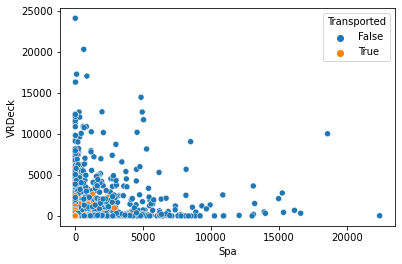

In [173]:
sns.scatterplot( x=file.Spa,y=file.VRDeck,hue = file.Transported)

In [33]:
spa, spa_true = 0,0
for i in range(len(file)):
    if file.loc[:,'Spa'][i]>=4110:
        spa += 1
    if file.loc[:,'Spa'][i]>=4110 and file.loc[:,'Transported'][i]==True:
        spa_true += 1

In [174]:
print('People who took spa above 4110 : ', spa)
print('People who took spa above 4110 and Transported : ', spa_true)
print('Ratio : ', spa_true/spa *100)
print('% of People who took spa above 4110 and not Transported : ', (1-spa_true/spa)*100)

People who took spa above 4110 :  125
People who took spa above 4110 and Transported :  0
Ratio :  0.0
% of People who took spa above 4110 and not Transported :  100.0


In [175]:
vr, vr_true = 0,0
for i in range(len(file)):
    if file.loc[:,'VRDeck'][i]>=5000:
        vr += 1
    if file.loc[:,'VRDeck'][i]>=5000 and file.loc[:,'Transported'][i]==True:
        vr_true += 1

In [176]:
print('People who took VRDeck above 5000 : ', vr)
print('People who took VRDeck above 5000 and Transported : ', vr_true)
print('Ratio of Transportation : ', vr_true/vr *100)
print('% of People who took VRDeck above 5000 and not Transported : ', (1-vr_true/vr)*100)

People who took VRDeck above 5000 :  96
People who took VRDeck above 5000 and Transported :  1
Ratio of Transportation :  1.0416666666666665
% of People who took VRDeck above 5000 and not Transported :  98.95833333333334


There is no chance of people spending on VRDech and Spa above 5000 getting Transported

name dosent give anything

Coorelation

In [177]:
corr = file.corr()

<AxesSubplot:>

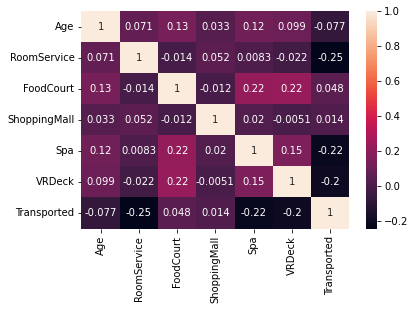

In [178]:
sns.heatmap(corr, annot = True)

No high corelation Present

In [179]:
file.Transported.value_counts() #Data is Balanced

True     3893
False    3843
Name: Transported, dtype: int64

Splitting the data

In [180]:
file = file.drop('Cabin', axis = 1)
file.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [181]:
ohe = ['HomePlanet' , 'CryoSleep','Destination','VIP']

In [182]:
file.head()

for i in range(len(file)):
    if file.loc[:,'Transported'][i] == True:
        file.loc[:,'Transported'][i] = 1
    if file.loc[:,'Transported'][i] == False:
        file.loc[:,'Transported'][i] = -1

C:\Users\samar\AppData\Local\Temp\ipykernel_22260\1068926003.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [262]:
file.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,-1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,-1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,-1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [263]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(file[ohe]).toarray())

final_df = file.join(encoder_df)

In [264]:
final_df = final_df.drop(ohe, axis = 1)

In [265]:
final = final_df.copy()

In [266]:
final.head(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2,3,4,5,6,7,8,9
0,39.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [187]:
y = final['Transported']
X = final.drop(['Transported'], axis = 1)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [189]:
X_train = X_train.to_numpy().copy()
y_train = y_train.to_numpy().copy()

In [190]:
X_train=X_train 

In [191]:
y_train=y_train.astype('int') 

In [197]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = 9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

[Text(0.37204186893203883, 0.95, 'X[9] <= 0.5\ngini = 0.5\nsamples = 5415\nvalue = [2697, 2718]'),
 Text(0.13804611650485438, 0.85, 'X[6] <= 0.5\ngini = 0.309\nsamples = 1946\nvalue = [371, 1575]'),
 Text(0.01901294498381877, 0.75, 'X[8] <= 0.5\ngini = 0.084\nsamples = 1021\nvalue = [45, 976]'),
 Text(0.006472491909385114, 0.65, 'X[0] <= 3.0\ngini = 0.027\nsamples = 586\nvalue = [8, 578]'),
 Text(0.003236245954692557, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.009708737864077669, 0.55, 'X[13] <= 0.5\ngini = 0.017\nsamples = 583\nvalue = [5, 578]'),
 Text(0.006472491909385114, 0.45, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.012944983818770227, 0.45, 'X[0] <= 35.5\ngini = 0.034\nsamples = 291\nvalue = [5, 286]'),
 Text(0.009708737864077669, 0.35, 'X[0] <= 34.5\ngini = 0.05\nsamples = 193\nvalue = [5, 188]'),
 Text(0.006472491909385114, 0.25, 'X[0] <= 18.5\ngini = 0.043\nsamples = 184\nvalue = [4, 180]'),
 Text(0.003236245954692557, 0.15, 'gini = 0.0\nsamples 

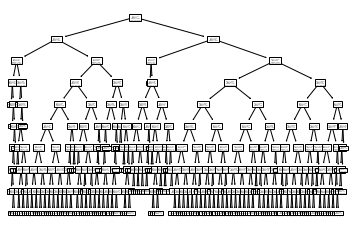

In [198]:
tree.plot_tree(dt)

In [200]:
X_test = X_test
y_test = y_test.astype('int')
dt.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.7806979750107712

In [201]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'entropy', max_depth=9)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.7867298578199052

In [202]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf') 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.7854373115036622

In [203]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.7781128823782852

In [204]:
from sklearn.neighbors import KNeighborsClassifier  
clf= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.7613097802671263

Ensemble Learning using Bagging

In [208]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(criterion = 'entropy',random_state=42)
clf3 = SVC(kernel='rbf', probability=True, random_state=42)

eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('SVC', clf3)],
                        voting='soft', weights=[1,1.5,1.35])

eclf.fit(X_train, y_train)
print(eclf.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only suppo

0.7962085308056872


Train this model on full data

In [209]:
X = X.to_numpy().copy()
y = y.to_numpy().astype('int')

In [210]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(criterion = 'entropy',random_state=42)
clf3 = SVC(kernel='rbf', probability=True, random_state=42)

eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('SVC', clf3)],
                        voting='soft', weights=[1,1.5,1.23])

eclf.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('RF',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('SVC', SVC(probability=True, random_state=42))],
                 voting='soft', weights=[1, 1.5, 1.23])

Submission

In [323]:
test = pd.read_csv('test.csv') 
final_test = test.copy()

In [324]:
final_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [325]:
final_test.isnull().sum().sum()

1117

In [326]:
final_test['Age'] = final_test['Age'].replace(np.nan, file.Age.mean())
final_test['RoomService'] = final_test['RoomService'].replace(np.nan, 0)
final_test['FoodCourt'] = final_test['FoodCourt'].replace(np.nan, 0)
final_test['ShoppingMall'] = final_test['ShoppingMall'].replace(np.nan, 0)
final_test['Spa'] = final_test['Spa'].replace(np.nan, 0)
final_test['VRDeck'] = final_test['VRDeck'].replace(np.nan, 0)

In [327]:
ohe = ['HomePlanet' , 'CryoSleep','Destination','VIP']
drop = ['Name','PassengerId','Cabin']

In [328]:
final_encoded_test = pd.DataFrame(encoder.transform(file[ohe]).toarray())
final_test = final_test.join(final_encoded_test)
final_test = final_test.drop(ohe+drop, axis = 1)

In [329]:
pred = eclf.predict(final_test.to_numpy())

In [330]:
my_submission = pd.DataFrame({'Transported':pred})

In [331]:
my_submission['Transported'] = my_submission['Transported'].replace(1,True)
my_submission['Transported'] = my_submission['Transported'].replace(-1,False)
my_submission = pd.concat([test['PassengerId'],my_submission],axis = 1)

In [332]:
my_submission.to_csv('submission.csv', index=False)

In [333]:
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
data = {'PassengerId': df_test['PassengerId'], 'Survived': y_test}
df_output = pd.DataFrame(data, columns=['PassengerId', 'Survived'])